# pyStrat_draft

This notebook is a draft/testing stage for pyStrat.

## import modules

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
% matplotlib inline

## import data

Note that the .csv must follow the form of the template (adapted from the Matstrat template):

* lines 1-4 can be filled with arbitrary relevant information - the code will start reading in data at line 5

* Lithofacies:

    * line 5 MUST contain at least two headers

    * one of these headers MUST be named 'THICKNESS' - other columns may be named whatever the user desires
    
* Samples:
    
    * currently this function supports ash, dz, and paleomagnetism samples (follow the template format). More flexibility will be introduced later.

In [2]:
# the data
data = pd.read_csv('data_template.csv', header=4)

# get rid of blank columns
cols = []
for c in data.columns:
    if 'Unnamed' not in c:
        cols.append(c)
data=data[cols]

data.head()

,THICKNESS,LITHOLOGY,GRAIN_SIZE,COLOUR,FEATURES,HASH,ASH,ASH_HEIGHT,DZ,DZ_HEIGHT,PM_SITE,PM_SAMPLE,PM_HEIGHT
0,14.8,si,sts,purple,NaN,NaN,Hongzixi1-53.1,911.7,Hongzixi2-237.8,237.8,16TR001,A,934.60
1,0.2,tuff,tuff,tuff,NaN,NaN,Hongzixi1-148.0,1006.6,Hongzixi2-349.6,349.6,16TR001,B,934.72
2,1.5,si,sts,purple,NaN,NaN,Hongzixi1-148.9,1007.5,Hongzixi2-403.5,403.5,16TR001,C,935.04
3,4.8,cover,cover,cover,NaN,NaN,Hongzixi2-138.3,138.3,Hongzixi2-532.8,532.8,16TR001,D,935.03
4,3.7,si,sts,purple,NaN,NaN,Hongzixi2-159.4,159.4,Hongzixi3-#3+224.7,1671.3,16TR001,E,935.14


## import formatting

Note that the .csv must follow the form of the template:

* columns 1-4 are used to set the colour of the boxes:

    * columns 1-3 must be called 'r', 'g', and 'b' (for red, green, and blue)
    
        * values in columns 1-3 must be between 0-255

    * the header of column 4 must match one of the headers used in the data .csv, and all values in the data must be a subset of the values in this column

* columns 6-7 are used to set the width of the boxes:

    * column 6 must be called 'width'

    * the header of column 7 must match one of the headers used in the data .csv, and all values in the data must be a subset of the values in this column
    
* column 5 should be left blank for readability

In [3]:
# the formatting
formatting = pd.read_csv('format_template.csv')

# convert rgb to 0-1 scale for plotting
for i in range(len(formatting.index)):
    formatting.loc[i,'r'] = formatting.loc[i,'r'] / 255
    formatting.loc[i,'g'] = formatting.loc[i,'g'] / 255
    formatting.loc[i,'b'] = formatting.loc[i,'b'] / 255
    
formatting.head()

,r,g,b,COLOUR,Unnamed: 4,width,GRAIN_SIZE
0,0.784314,0.525490,0.823529,purple,NaN,0.30,sts
1,1.000000,0.827451,0.862745,tuff,NaN,1.00,tuff
2,1.000000,1.000000,1.000000,cover,NaN,0.20,cover
3,0.168627,0.713725,0.450980,green,NaN,0.30,sts-tuff
4,0.509804,0.666667,1.000000,purple-green,NaN,0.35,sts-vfss


## check that values in the data are a subset of values in the formatting

In [4]:
# get the colour and width headers being used
colour_header = formatting.columns[3]
width_header = formatting.columns[6]

# loop over values in the data
for i in range(len(data.index)):
    all_check = True
    colour_check = False
    width_check = False
    
    # only check if the value is not nan
    if pd.notnull(data['THICKNESS'][i]):
    
        # check to see if specified value is in the formatting table
        for j in range(len(formatting.index)):
            if data[colour_header][i] == formatting[colour_header][j]:
                colour_check = True
            if data[width_header][i] == formatting[width_header][j]:
                width_check = True

        # print warning if the check fails
        if colour_check == False:
            print('Colour check failed for item ' + str(data[colour_header][i]) + '.')
            all_check = False
        if width_check == False:
            print('Width check failed for item ' + str(data[width_header][i]) + '.')
            all_check = False

# print an all clear statement if the check passes
if all_check:
    print('Colour and width check passed.')

Colour and width check passed.


## plot everything

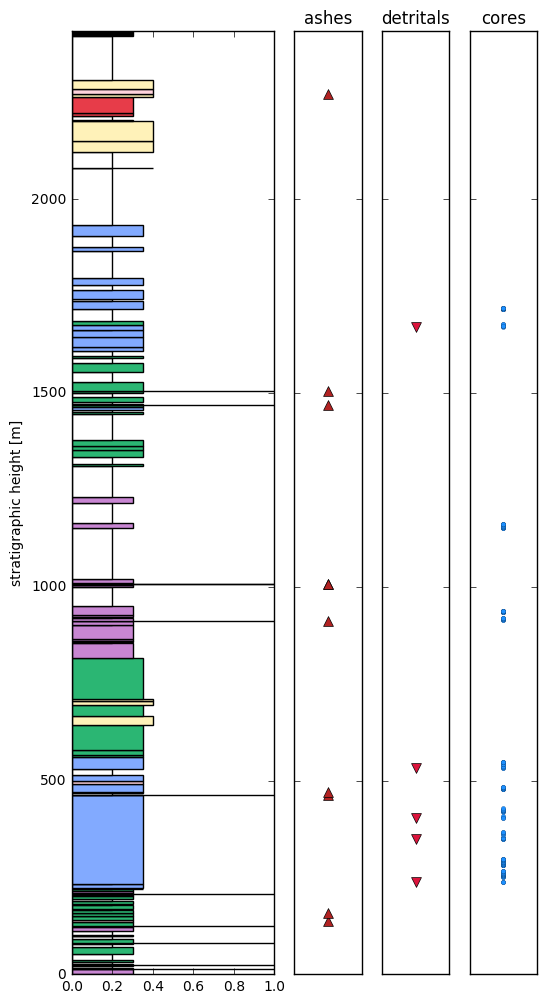

In [5]:
# patches.Rectangle((x, y), width, height, facecolor=[r,g,b])

# create the figure and axis handles, and initiate counting of the stratigraphic height
fig, axs = plt.subplots(nrows=1, ncols=4, sharey=True, gridspec_kw = {'width_ratios':[3,1,1,1]})
strat_height = 0.0

# loop over elements of the data
for i in range(len(data.index)):
    
    # only plot non-nan cells
    if pd.notnull(data['THICKNESS'][i]):
    
        # find the thickness to be used
        this_thickness = data['THICKNESS'][i]

        # find the colour and width to be used
        for j in range(len(formatting.index)):
            if data[colour_header][i] == formatting[colour_header][j]:
                this_colour = [formatting['r'][j], formatting['g'][j], formatting['b'][j]]
            if data[width_header][i] == formatting[width_header][j]:
                this_width = formatting['width'][j]

        # create the rectangle
        axs[0].add_patch(patches.Rectangle((0.0,strat_height), this_width, this_thickness, facecolor=this_colour))

        # count the stratigraphic height
        strat_height = strat_height + this_thickness

# force the limits on the lithostratigraphy plot
axs[0].set_xlim([0,1])
axs[0].set_ylim([0,strat_height])

# plot the samples
axs[1].scatter(np.zeros(len(data['ASH_HEIGHT'])),data['ASH_HEIGHT'],\
               marker='^',color='firebrick',s=50,edgecolors='k',linewidth=0.5)
axs[2].scatter(np.zeros(len(data['DZ_HEIGHT'])),data['DZ_HEIGHT'],\
               marker='v',color='crimson',s=50,edgecolors='k',linewidth=0.5)
axs[3].scatter(np.zeros(len(data['PM_HEIGHT'])),data['PM_HEIGHT'],\
               marker='o',color='dodgerblue',s=10,edgecolors='k',linewidth=0.1)

# force the size of the plot
ratio = 0.005
fig.set_figheight(strat_height * ratio)
fig.set_figwidth(6)

# prettify
axs[0].set_ylabel('stratigraphic height [m]')
axs[1].set_title('ashes')
axs[2].set_title('detritals')
axs[3].set_title('cores')
axs[1].set_xticklabels([])
axs[2].set_xticklabels([])
axs[3].set_xticklabels([])
axs[1].set_xticks([])
axs[2].set_xticks([])
axs[3].set_xticks([])
    
plt.show(fig)